# Equipe:

1.   Eduardo Fontes Baltazar da Silveira
2.   João Pedro Lima Ribeiro
3.   André Neves da Rocha Castro




In [28]:
import matplotlib.pyplot as plt
import numpy as np


In [29]:

class Perceptron:
    def __init__(self, input_size, learning_rate=0.001, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = np.zeros(input_size + 1)  # Inclui o bias no vetor de pesos

    def activation_function(self, x):
        return np.where(x >= 0, 1, 0)

    def predict(self, X):
        return self.activation_function(np.dot(X, self.weights[1:]) + self.weights[0])

    def train(self, X, y):
        errors = []
        for _ in range(self.epochs):
            total_error = 0
            for xi, target in zip(X, y):
                prediction = self.predict(xi)
                error = target - prediction
                self.weights[1:] += self.learning_rate * error * xi
                self.weights[0] += self.learning_rate * error  # Atualiza o bias
                total_error += abs(error)
            errors.append(total_error)
        return errors


In [30]:
# Dados para as operações lógicas
def logical_data(operation="OR"):
    if operation == "OR":
        X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
        y = np.array([0, 1, 1, 1])  # Saída para OR
    elif operation == "AND":
        X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
        y = np.array([0, 0, 0, 1])  # Saída para AND
    return X, y




In [31]:
def accuracy_score(y_true, y_pred):
    return np.mean(y_true == y_pred)


In [32]:
# Função para treinar o perceptron e plotar resultados
def train_and_plot(operation="OR"):
    X, y = logical_data(operation)
    perceptron = Perceptron(input_size=2, learning_rate=0.1, epochs=10)
    errors = perceptron.train(X, y)
    accuracy_score(y, perceptron.predict(X))
    # Plot da curva de erro
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(errors, marker='o')
    plt.title(f'Curva de Erro - Operação {operation}')
    plt.xlabel('Épocas')
    plt.ylabel('Erro Total')

    # Plot da reta de separação
    plt.subplot(1, 2, 2)
    x_min, x_max = -0.1, 1.1
    y_min, y_max = -0.1, 1.1
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title(f'Fronteira de Decisão - Operação {operation}')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')

    # Calcula e plota a reta de separação
    x_vals = np.array([x_min, x_max])
    y_vals = -(perceptron.weights[1] * x_vals + perceptron.weights[0]) / perceptron.weights[2]
    plt.plot(x_vals, y_vals, 'g-')
    plt.show()
    return accuracy_score(y, perceptron.predict(X))


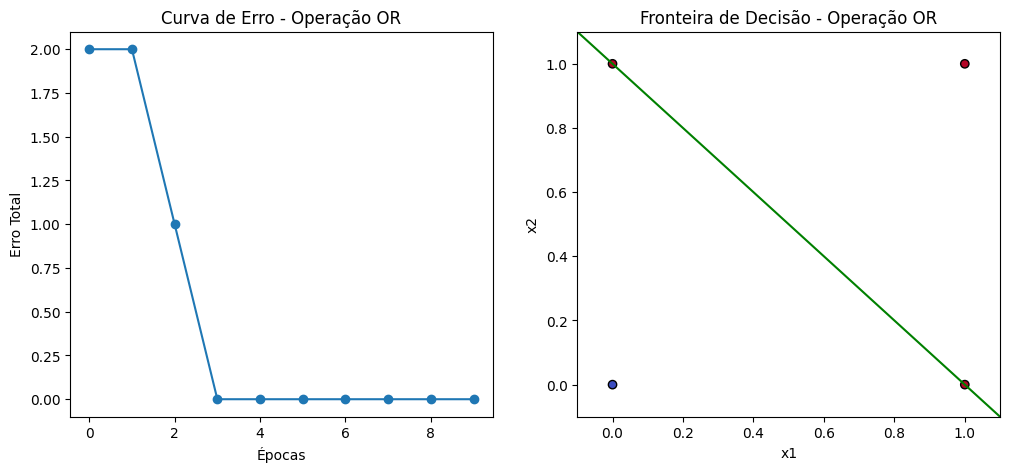

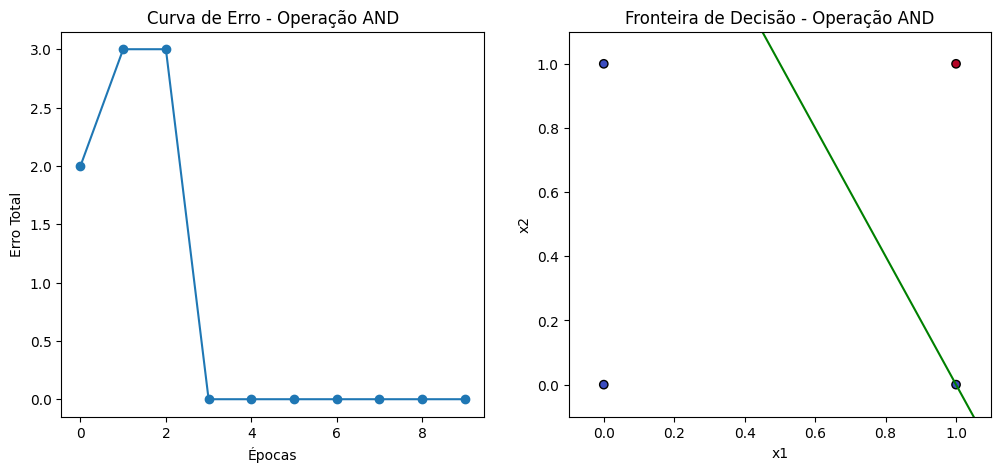

In [33]:
# Treinamento e plotagem para as operações lógicas OR e AND
accuracy_or = train_and_plot("OR")
accuracy_and = train_and_plot("AND")


In [34]:
print(f"Acurácia para OR: {accuracy_or}")
print(f"Acurácia para AND: {accuracy_and}")

Acurácia para OR: 1.0
Acurácia para AND: 1.0
